In [1]:
import numpy as np
import pickle

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist, pdist

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set_context('talk')

In [2]:
# with open('./no_cap_runs/optimal_clustering_results_117.pickle','rb') as f:
#     res = pickle.load(f)
    
with open('optimal_clustering_results_208.pickle','rb') as f:
    res = pickle.load(f)

In [3]:
### loading data
# select dataset and encoding type
dataName = 'allHV.npz'
emgHVType =  'hvRel'

allHV = np.load(dataName)

# extract data and labels based on gesture, trial, and position
hv = allHV[emgHVType]
gestLabel = allHV['gestLabel']
posLabel = allHV['posLabel']
trialLabel = allHV['trialLabel']

combGP, groupGP = np.unique(np.column_stack((gestLabel,posLabel)),axis=0,return_inverse=True)
combGPT, groupGPT = np.unique(np.column_stack((gestLabel,posLabel,trialLabel)),axis=0,return_inverse=True)

# get list of unique values for each label
gestures = np.unique(gestLabel)
positions = np.unique(posLabel)
trials = np.unique(trialLabel)

numGestures = len(gestures)
numPositions = len(positions)
numTrials = len(trials)

# get data size info
D = hv.shape[1] # hypervector dimension
numHV = 80 # number of examples per trial

maxClust = numGestures*numPositions*2
clustering = []
for g in gestures:
    with open('./clustOut/g' + str(g) + '_clusters.pickle','rb') as f:
        cSingles = pickle.load(f)
        cNonSingles = {}
        idx = 1
        for n in range(1,maxClust+1):
            while sum(np.unique(cSingles[idx],return_counts=True)[1] > 1) < n:
                idx += 1
            cNonSingles[n] = cSingles[idx]
        clustering.append(cNonSingles)

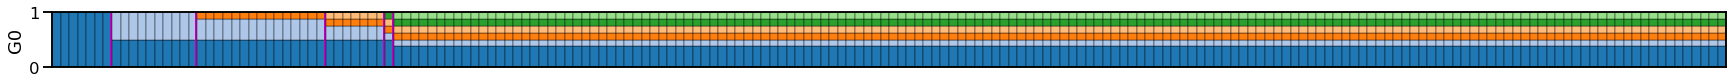

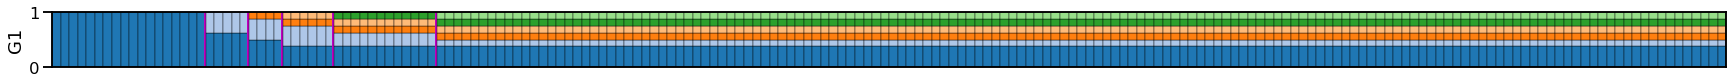

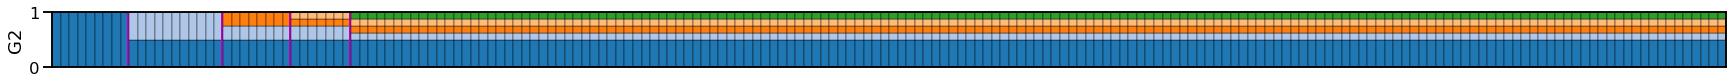

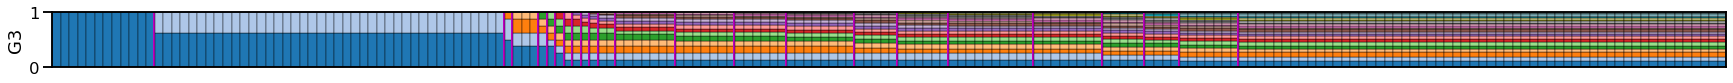

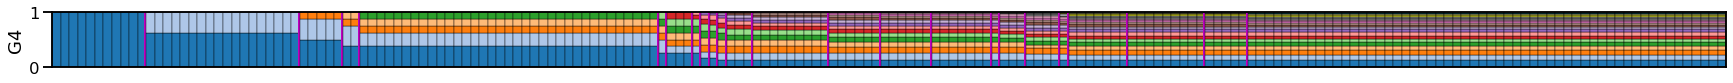

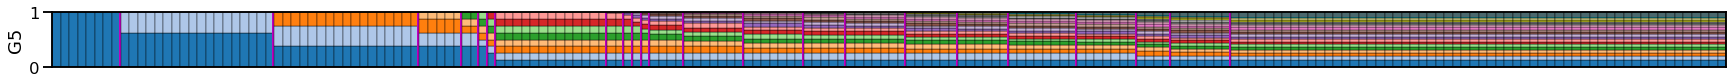

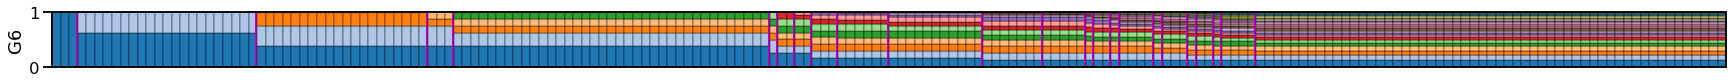

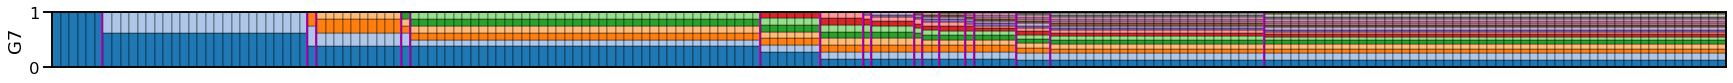

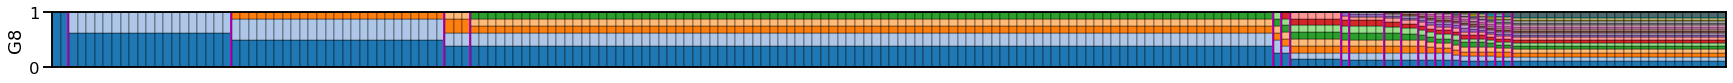

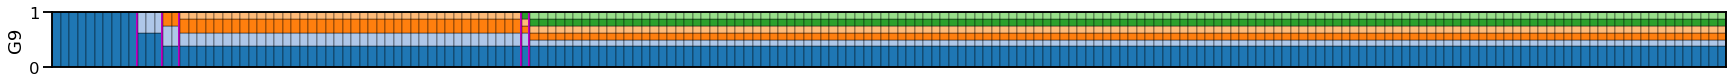

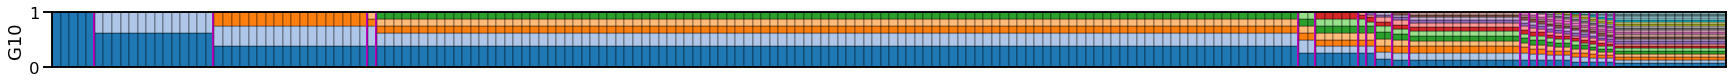

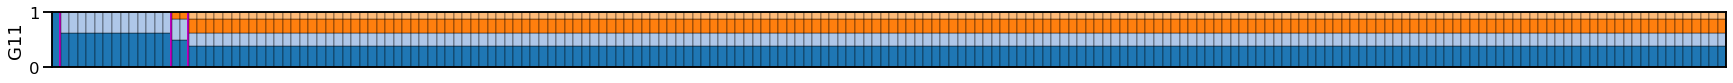

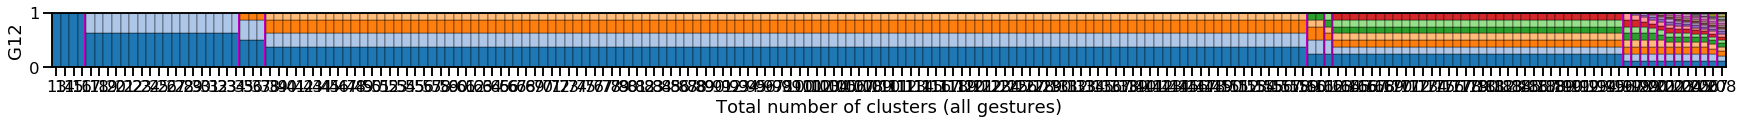

In [4]:
clusterCounts = np.zeros((len(res),numGestures))
accs = np.zeros(len(res))
for g in gestures:
    f,ax = plt.subplots(figsize=(30,1))
    lastClust = 1
    for x,totalClust in enumerate(res.keys()):
        accs[x] = res[totalClust][1]
        numClust = res[totalClust][0][g]
        clusterCounts[x,g] = numClust
        clustSizes = np.sort(np.unique(clustering[g][numClust],return_counts=True)[1])[::-1]
        clustSizes = clustSizes/sum(clustSizes)
        baseVal = 0
        if numClust > lastClust:
            ax.bar(totalClust,1,1,bottom=0,edgecolor='m',linewidth=5)
        for i,n in enumerate(clustSizes):
            ax.bar(totalClust,n,1,bottom=baseVal,color=plt.cm.tab20(i),edgecolor='black',linewidth=0.4)
            baseVal += n
        
        lastClust = numClust
    ax.set_ylim((0,1))
    ax.set_xlim((min(list(res.keys())) - 0.5, max(list(res.keys())) + 0.5))
    if g == max(gestures):
        ax.set_xticks(list(res.keys()))
        ax.set_xlabel('Total number of clusters (all gestures)')
    else:
        ax.set_xticks([])
        ax.set_xlabel('')
    ax.set_yticks([0, 1])
    
    ax.set_ylabel('G%d' % (g))
    plt.show()

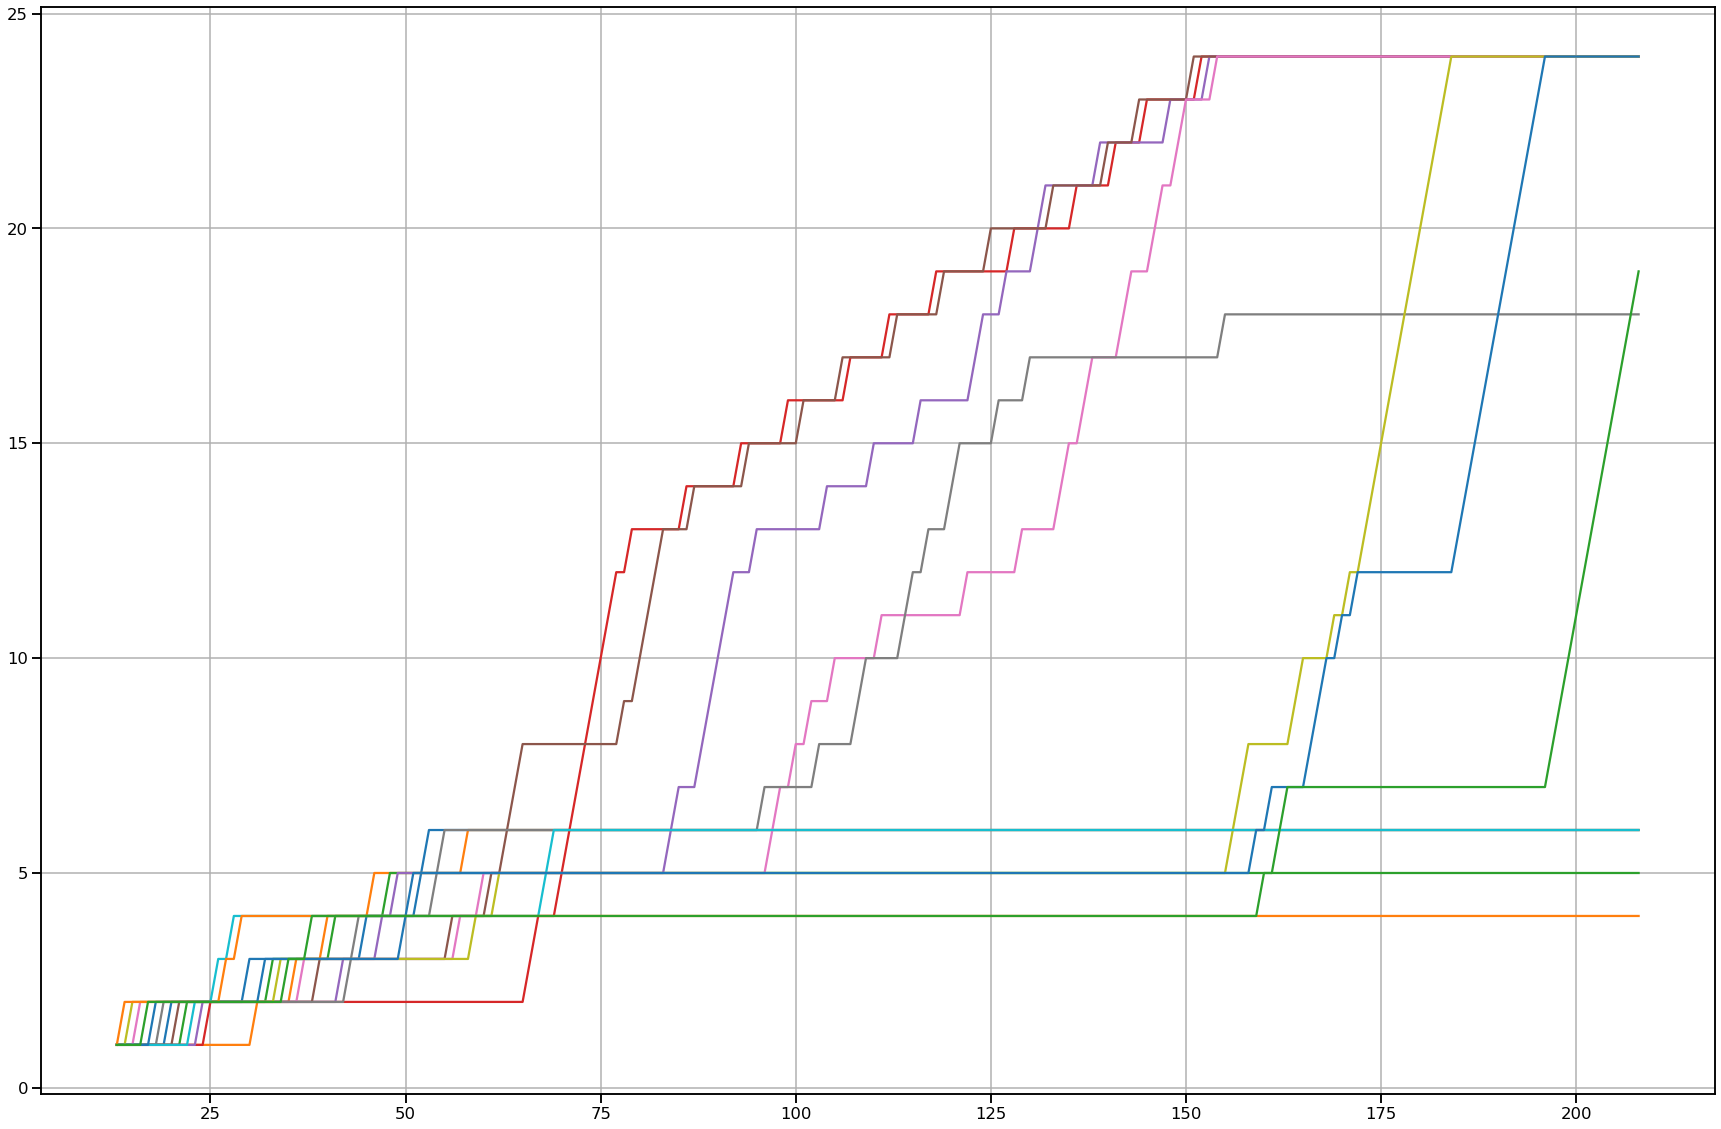

In [5]:
f,ax = plt.subplots(figsize=(30,20))
ax.plot(list(res.keys()),clusterCounts)
ax.grid(True)
plt.show()


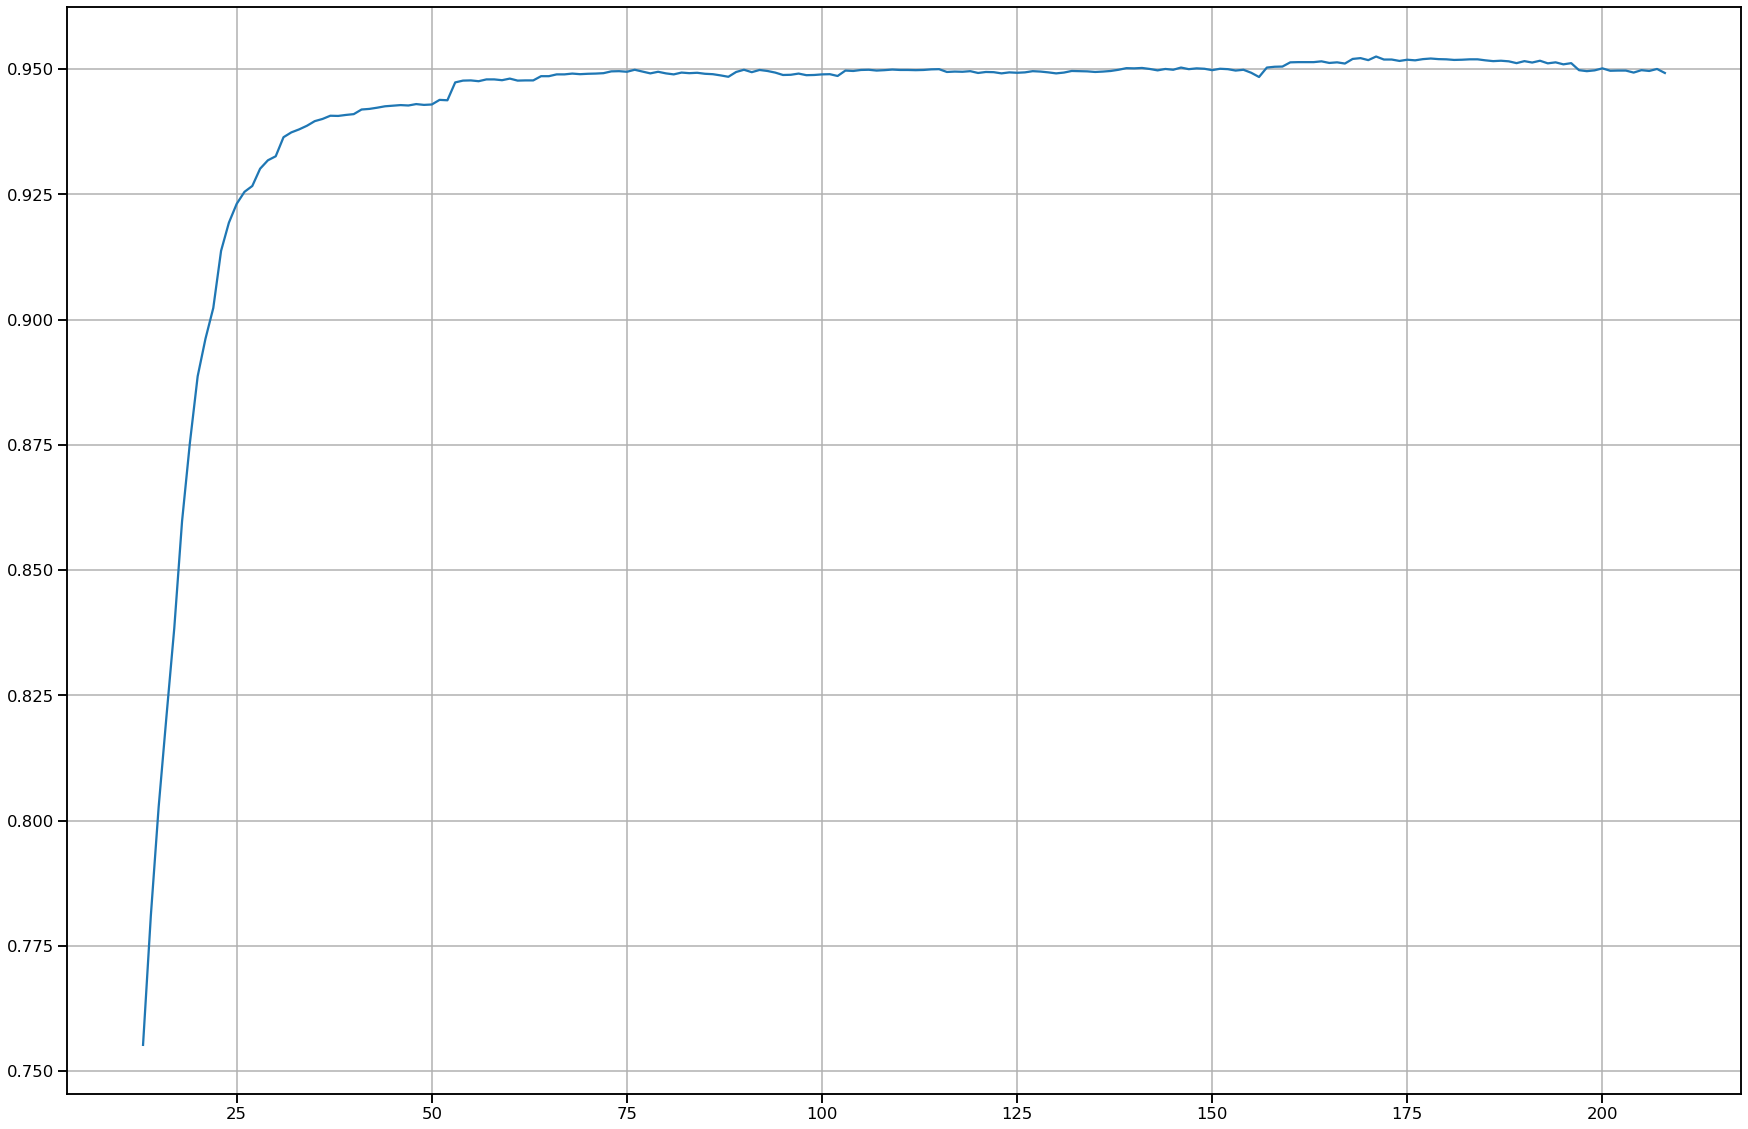

In [6]:
f,ax = plt.subplots(figsize=(30,20))
ax.plot(list(res.keys()),accs)
ax.grid(True)
plt.show()

In [7]:
with open('./clustOut/g3_clusters.pickle','rb') as f:
    c = pickle.load(f)
sum(np.unique(c[30],return_counts=True)[1])

1920

In [8]:
numClusts = res[77][0]
numClusts

array([ 6,  6,  5, 12,  5,  8,  5,  6,  5,  6,  5,  4,  4])

In [9]:
numClusts/sum(numClusts)

array([0.07792208, 0.07792208, 0.06493506, 0.15584416, 0.06493506,
       0.1038961 , 0.06493506, 0.07792208, 0.06493506, 0.07792208,
       0.06493506, 0.05194805, 0.05194805])

In [10]:
1/13

0.07692307692307693

In [11]:
2/13

0.15384615384615385